In [3]:
import pandas as pd

maxMeetings = pd.read_csv('./data/maxMeetings.csv')

In [12]:
import numpy as np


class University:
    def __init__(self, code, name, availabilities: np.ndarray[(5, 34)]):
        self.code = code
        self.name = name
        self.availabilities = availabilities

    def is_available(self, day, time):
        return self.availabilities[day, time]

    def get_schedule(self, day):
        return self.availabilities[day]

    def get_all_schedules(self):
        return self.availabilities

    def __str__(self):
        return f'{self.code} - {self.name}'

    def __repr__(self):
        return f'{self.code} - {self.name}'

    def __eq__(self, other):
        return self.code == other.code

    def __hash__(self):
        return hash(self.code)




In [13]:
# Create a list of University objects
import json

universities = []
with open('./data/allAvailabilities.json') as f:
    data = json.load(f)
    for university_code in data:
        code = university_code
        name = data[university_code]['university']

        availabilities = np.array([data[university_code]['isAvailable'][day] for day in ['M', 'T', 'W', 'Th', 'F']])
        universities.append(University(code, name, availabilities))

universities

[M1 - University of Toronto,
 M2 - Toronto Metropolitan University,
 M3 - University of Michigan,
 M4 - École Polytechnique de Montréal,
 M5 - University of Guelph,
 M6 - University of Calgary,
 M7 - University of Prince Edward Island,
 M8 - University of Manitoba,
 M9 - National Research Council,
 M10 - Royal Military College of Canada,
 M11 - Dalhousie University,
 M12 - University of Windsor,
 M13 - Queen’s University,
 M14 - The University of Western Ontario,
 M15 - École Polytechnique de Montréal,
 M16 - Université du Québec en Abitibi-Témiscamingue,
 M17 - Université du Québec à Trois Rivieres,
 M18 - FPrimeC Solutions Inc.,
 M19 - Institut national de la recherche scientifique,
 M20 - Université du Québec à Chicoutimi,
 M21 - Université Catholique de Louvain,
 M22 - University of Northern British Columbia,
 M23 - University of Saskatchewan,
 M24 - University of Alberta,
 M25 - University of Waterloo,
 M26 - University of Alberta,
 M27 - Brock University,
 M28 - University of Cyp

In [14]:
universities[0].get_all_schedules()

array([[False, False, False, False,  True, False, False, False, False,
        False, False, False, False,  True,  True, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [False, False, False, False,  True, False, False, False, False,
        False, False, False, False,  True,  True, False, False, False,
         True,  True,  True,  True,  True,  True, False, False, False,
        False, False, False, False, False, False, False],
       [False, False, False, False,  True, False, False, False, False,
        False, False, False, False,  True,  True, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [False, False, False, False,  True, False, False, False, False,
        False, False, False, False,  True,  True, False, False, False,
         True,  True,  True,  True,  True,  T

In [22]:
# Find the schedule of each day for all universities, add to a numpy array

import numpy as np

# Create a numpy array to store the schedule of each day for all universities
schedule = np.zeros((40 * 5, 34))

# Iterate through each university
for i, university in enumerate(universities):
    schedule[i * 5: (i + 1) * 5, :] = university.get_all_schedules()

pd.DataFrame(schedule).describe()



,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.0,200.0,200.0,200.0,200.000000,200.000000,200.000000
mean,0.050000,0.125000,0.050000,0.070000,0.755000,0.170000,0.115000,0.265000,0.215000,0.115000,...,0.035000,0.060000,0.035000,0.0,0.0,0.0,0.0,0.025000,0.025000,0.010000
std,0.218492,0.331549,0.218492,0.255787,0.431166,0.376575,0.319823,0.442441,0.411853,0.319823,...,0.184241,0.238083,0.184241,0.0,0.0,0.0,0.0,0.156517,0.156517,0.099748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


In [23]:
dedup_schedules = np.unique(schedule, axis=0)
print(dedup_schedules.shape)
dedup_schedules


(28, 34)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

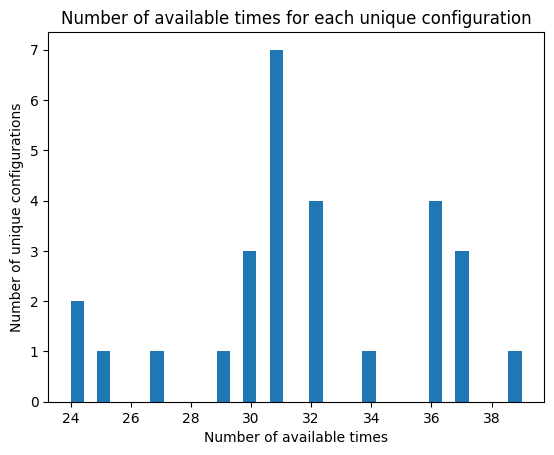

In [27]:
# Plot the number of ones in each row
import matplotlib.pyplot as plt

plt.hist(40 - np.sum(dedup_schedules, axis=1), bins=34)
plt.xlabel('Number of available times')
plt.ylabel('Number of unique configurations')
plt.title('Number of available times for each unique configuration')
plt.show()


In [32]:
# Find the number of ones in each unique configuration
num_ones = np.unique(34 - np.sum(dedup_schedules, axis=1), axis=0)
num_ones

array([18., 19., 21., 23., 24., 25., 26., 28., 30., 31., 33.])